# Machine Vision Lab 2

## Prereqiusite

In [97]:
# Imports
from PIL import Image, ImageFilter, ImageOps
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

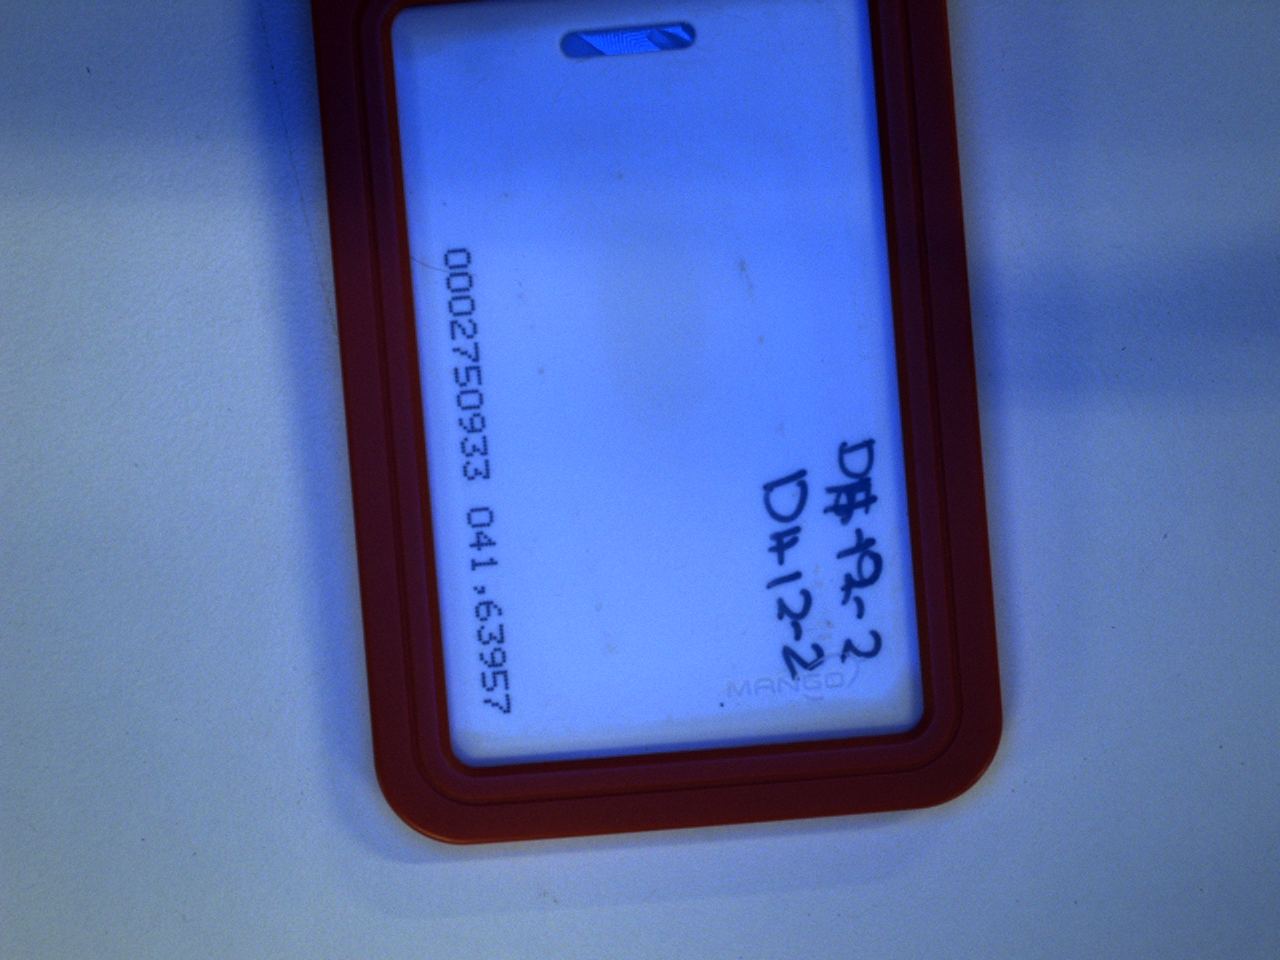

In [98]:
from PIL import Image

filename = 'D:\\UTAR\\Degree\\Y3S1\Machine Vision\\Practical\\Machine_Vision_Github\\Lab 1_Assets\\Access_Card.png'


with Image.open(filename) as img:
    img.load()

# img.format ##  format = PNG
# img.size ## size = (1280, 960)
# img.mode ## mode = RGB

display(img)

## Image Thresholding

### 1. Crop Image

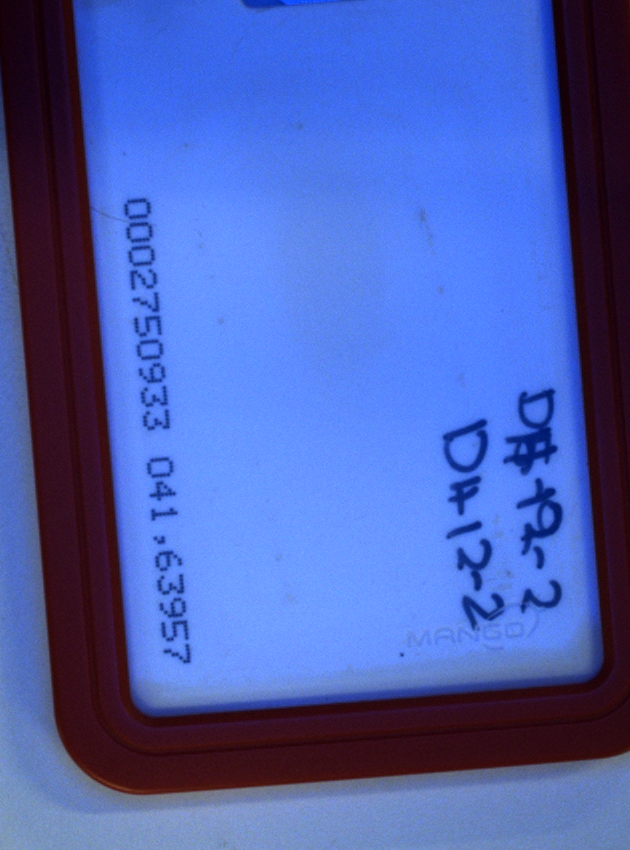

In [108]:
cropped_img = img.crop((320, 50, 950, 900)) 

# has 4 tuples defines left, upper, right, bottom
# Pillow assigns the coordinates (0,0) to the pixel at the upper-left corner

cropped_img.size 
(630, 850)
# the new image cropped has a size of 350 x 950 pixels

display(cropped_img)

### 2. Convert to Grayscale Image

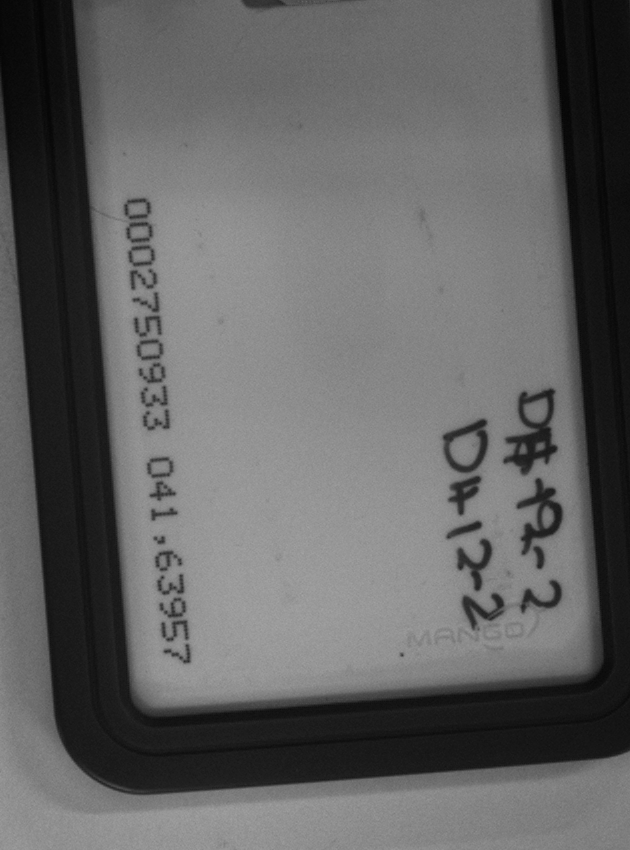

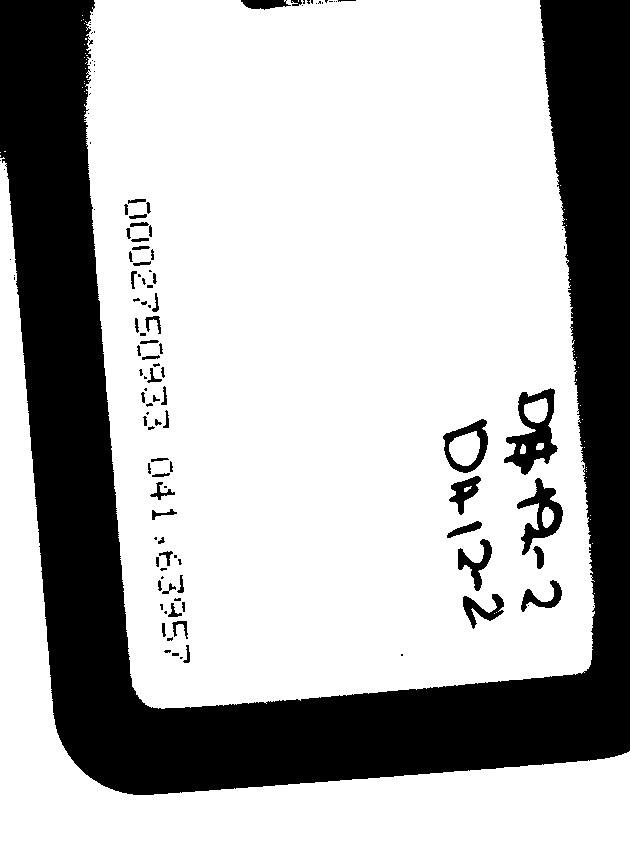

In [109]:
img_in_gray = cropped_img.convert("L")
display (img_in_gray) 

threshold = 80
# A pixel value greater than 80 are converted to white, and all other pixels are changed to black

threshold_img = img_in_gray.point(lambda x: 255 if x > threshold else 0)
display (threshold_img)

### 3. Image Thresholding

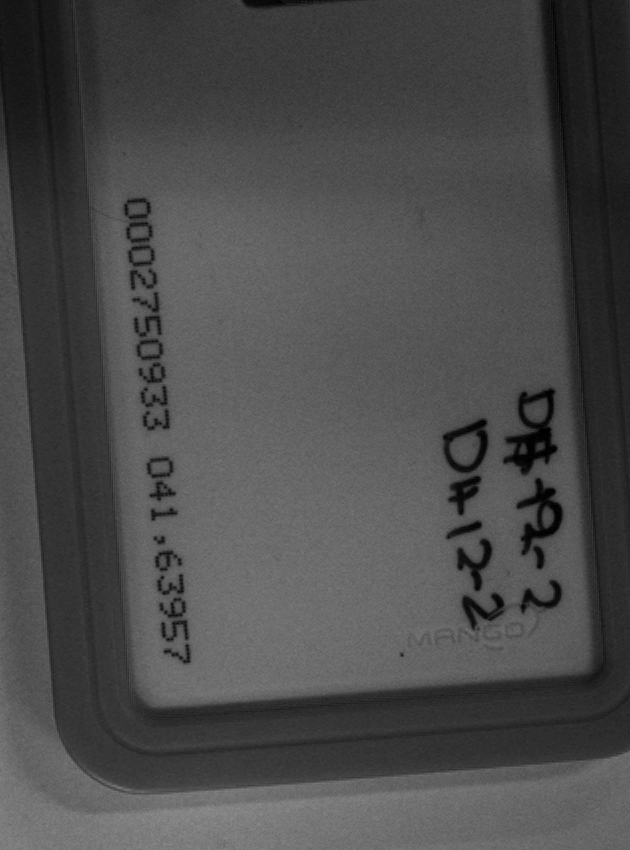

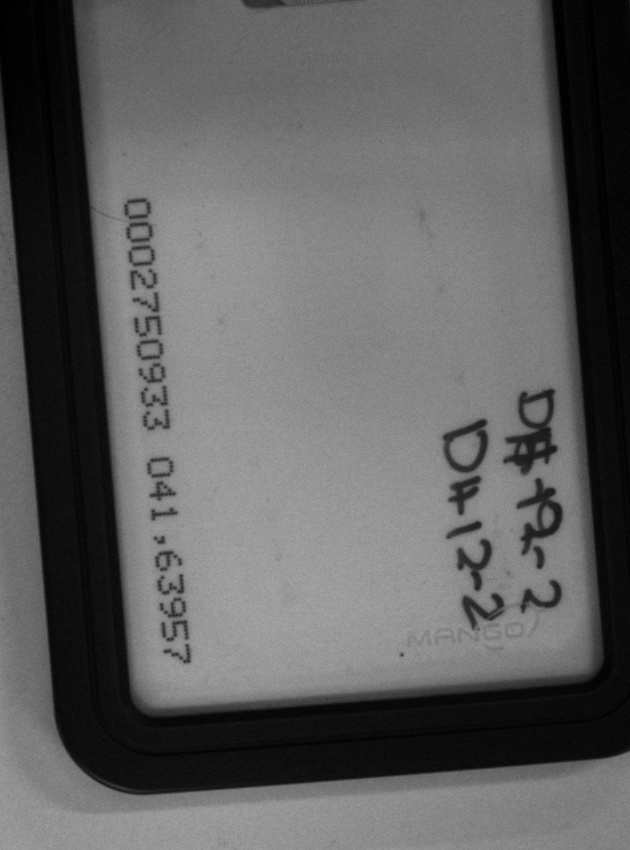

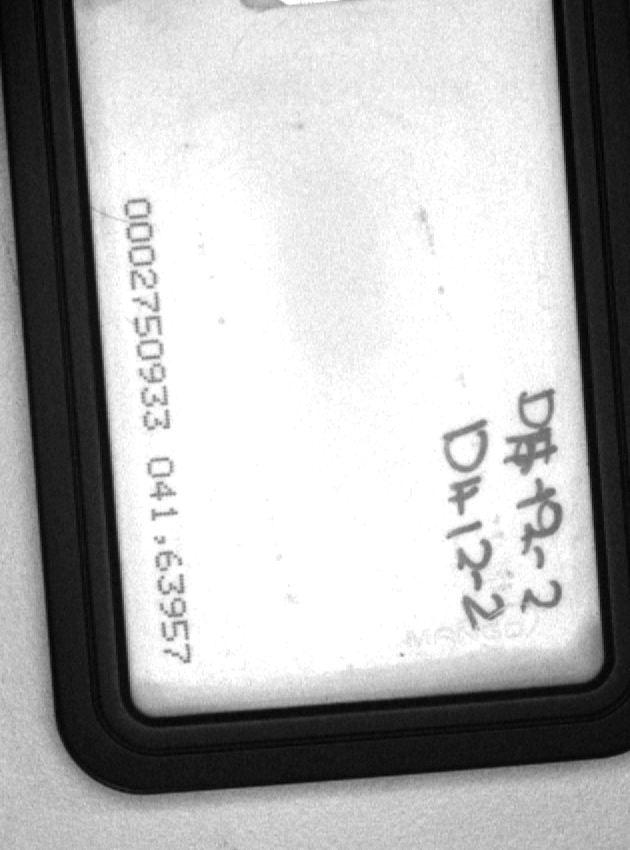

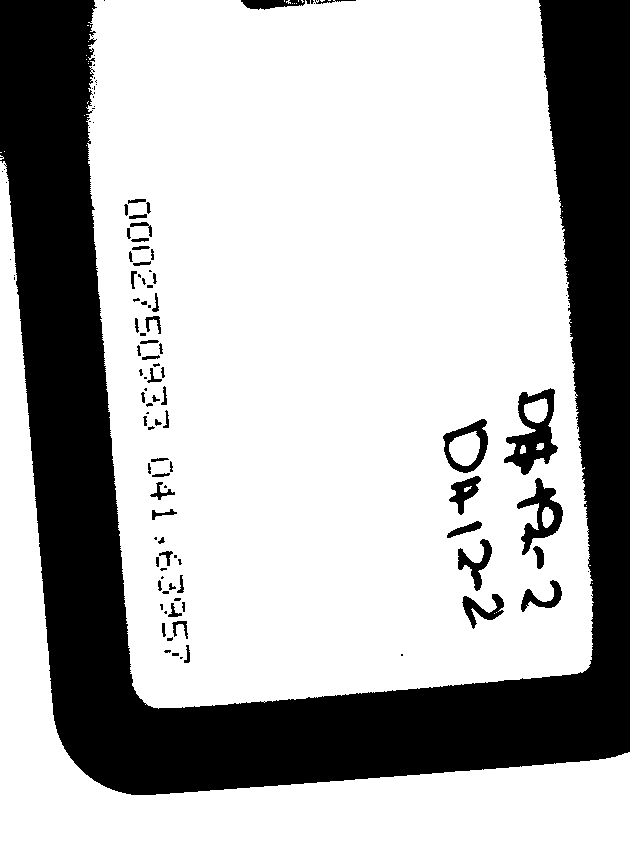

In [111]:
# Thresholding
threshold = 80

# Split image intensity into 3 colours
red, green, blue = cropped_img.split()  
display(red)   
display(green) 
display(blue)  # Pixel values of blue channel is higher compared to the red and green channels (Blue is dominant in original image)

threshold_img = green.point(lambda p: p > threshold and 255) # Thresholding 
# Red and Blue will have higher contrast after thresholding because the blue-dominant areas 
# They will fall below the threshold, making the difference between light and dark regions more pronounced.
display(threshold_img) 




## Image Segmentation Using Thresholding


### Self-Define Function for Erosion and Dilation

In [102]:
def erode(cycles, image):
    for _ in range(cycles):
        image = image.filter(ImageFilter.MinFilter(3))
    return image

def dilate(cycles, image):
    for _ in range(cycles):
        image = image.filter(ImageFilter.MaxFilter(3))
    return image

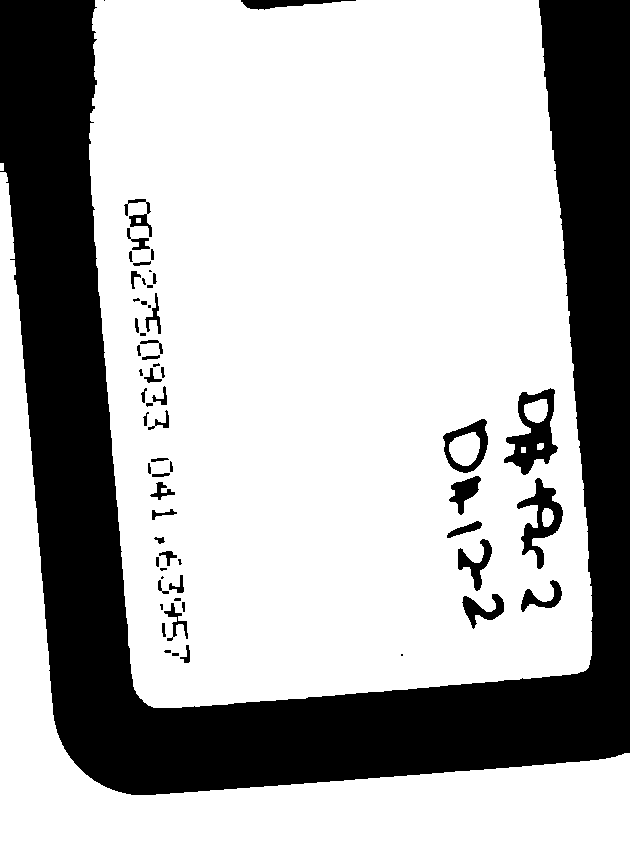

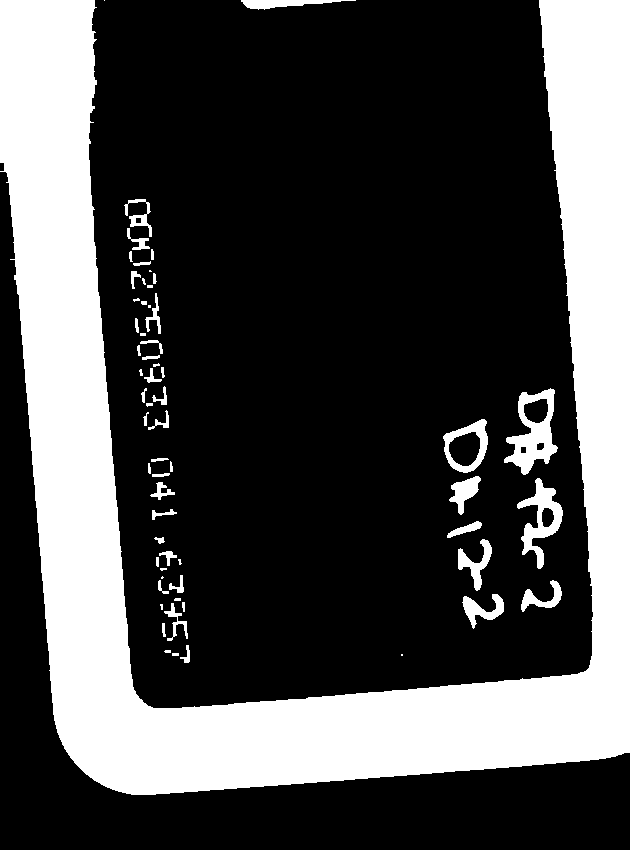

In [112]:
threshold = 80
red, green, blue = cropped_img.split()  
threshold_img = green.point(lambda p: p > threshold and 255) # Thresholding 

# Opening Process
threshold_img = erode(2, threshold_img)
threshold_img = dilate(2, threshold_img)

display(threshold_img)

# Invert image 
inverted_img = ImageOps.invert(threshold_img)
display(inverted_img)

### Applying Mask

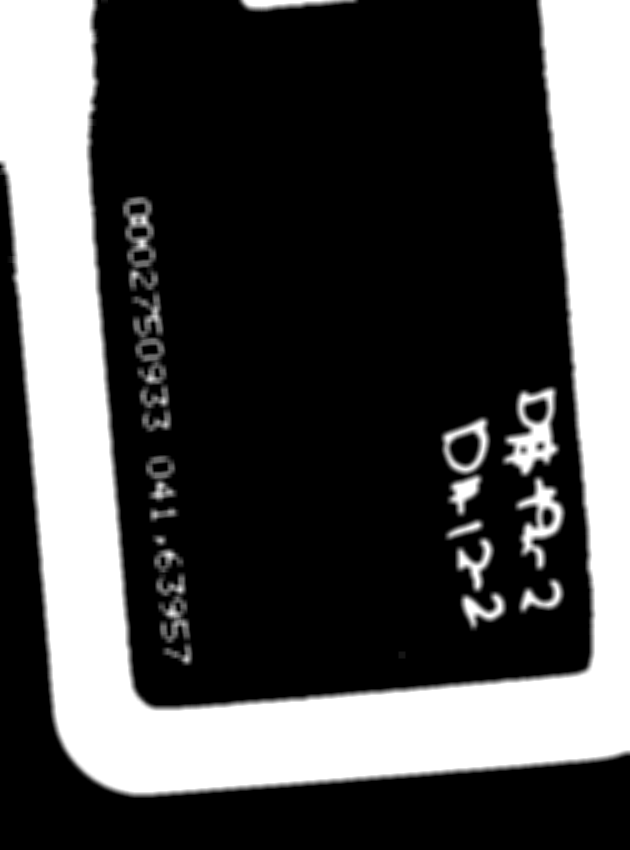

In [117]:
masked_img = inverted_img.convert("L")
masked_img  = inverted_img.filter(ImageFilter.BoxBlur(3))
display(masked_img)

### Extract Image

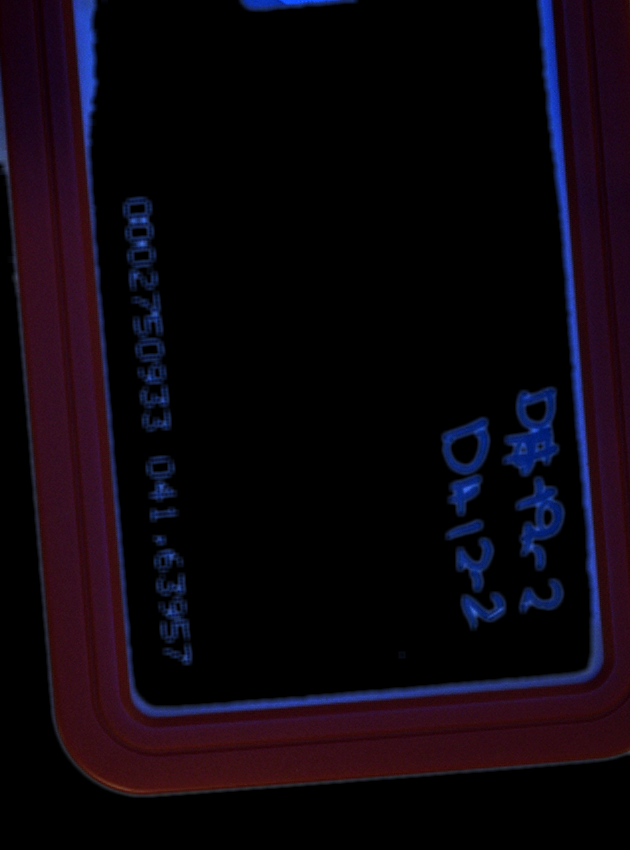

In [122]:
blank = cropped_img.point(lambda _: 0)
segmented_img = Image.composite(cropped_img, blank, masked_img)
display(segmented_img)